# Normal climatológica de precipitação e temperatura 
Estação 1006 - Florianópolis - Cetre/Epagri <br> 
Período analisado: Jan/2002 a Dez/2024

In [1]:
import pandas as pd
import locale
import matplotlib.pyplot as plt

## Precipitação 

In [2]:
# Dados de entrada
pasta = "C:\\ENS\\LAUTEC\\Inputs\\Normal_climatologica"
precipitacao = pd.read_excel(pasta+'\\precipitacao_diaria_ate_20_01_25.xls',
                             header=8,
                             index_col=0) 

In [3]:
# Somatório 
precipitacao = precipitacao.resample('ME').sum()

# Extrair dados de Jan/2002 a Dez/2024
precipitacao = precipitacao.loc[(precipitacao.index >= '2002-01-01')&(
    precipitacao.index <= '2024-12-31')]

# Coluna com o mês
precipitacao['Mês'] = precipitacao.index.month 

# Excluir meses em que a soma foi zero (problemas de medição) 
precipitacao = precipitacao.loc[~(precipitacao['Soma Diária'] == 0)] 

# Salvar planilha 
#precipitacao.to_excel(pasta+'\\resultados.xlsx') 

In [4]:
# Extrair valores mínimos, médios e máximos
prec_min = precipitacao.groupby('Mês').min()
prec_med = precipitacao.groupby('Mês').mean() 
prec_max = precipitacao.groupby('Mês').max()

## Temperatura 

In [5]:
# Dados de entrada 
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252') # Para reconhecer que as datas estão em português 
temp_min = pd.read_excel(pasta+'\\temp_min_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_min.index =  pd.to_datetime(temp_min.index, format='%d/%m/%Y %H:%M') 

temp_med = pd.read_excel(pasta+'\\temp_med_mensal_ate_20_01_25.xls',
                             header=8,
                             index_col=0)
temp_med.index = pd.to_datetime(temp_med.index, format='%b %Y')

temp_max = pd.read_excel(pasta+'\\temp_max_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_max.index =  pd.to_datetime(temp_max.index, format='%d/%m/%Y %H:%M')  

In [6]:
# Extrair dados de Jan/2002 a Dez/2024
temp_min = temp_min.loc[(temp_min.index >= '2002-01-01')&(
    temp_min.index <= '2024-12-31')]
temp_med = temp_med.loc[(temp_med.index >= '2002-01-01')&(
    temp_med.index <= '2024-12-31')]
temp_max = temp_max.loc[(temp_max.index >= '2002-01-01')&(
    temp_max.index <= '2024-12-31')]


# Coluna com o mês
temp_min['Mês'] = temp_min.index.month 
temp_med['Mês'] = temp_med.index.month 
temp_max['Mês'] = temp_max.index.month 

In [7]:
# Extrair valores mínimos, médios e máximos
temp_min = temp_min.groupby('Mês').mean()
temp_med = temp_med.groupby('Mês').mean() 
temp_max = temp_max.groupby('Mês').mean()

## Gráfico

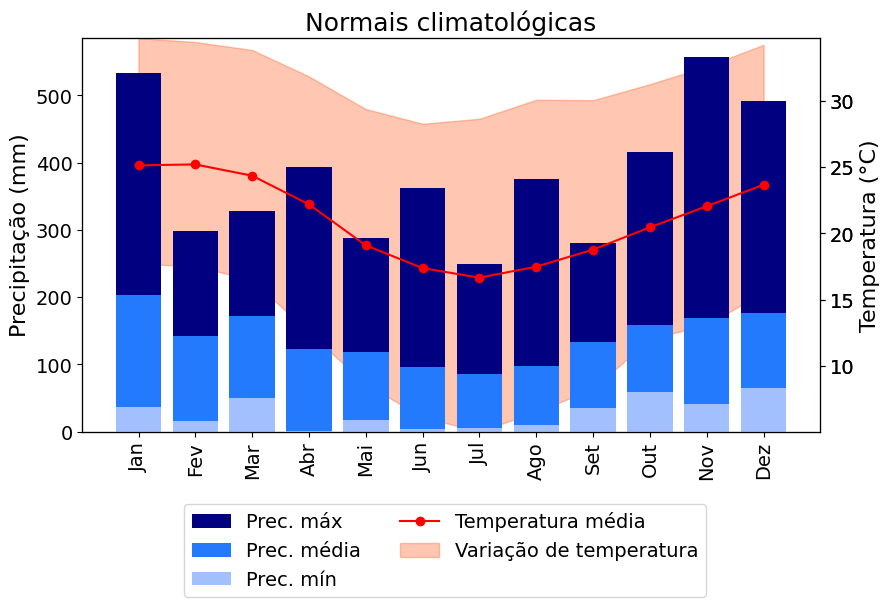

In [11]:
# Gráfico 
rotulos = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
           'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'] 

fig, ax1 = plt.subplots(figsize=(9,5)) 

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax3.fill_between(temp_med.index, 
                 temp_min['Mínimo Mensal'], 
                 temp_max['Máximo Mensal'], 
                 color='orangered', 
                 alpha=0.3, 
                 label='Variação de temperatura')  

temp, = ax2.plot(temp_med.index,
                 temp_med['Média Mensal'],
                 marker='o',
                 color='red',
                 label='Temperatura média')

ax1.bar(prec_max.index, 
        prec_max['Soma Diária'], 
        color='navy', 
        label='Prec. máx')
ax1.bar(prec_med.index, 
        prec_med['Soma Diária'], 
        color='xkcd:clear blue',
        label='Prec. média')
ax1.bar(prec_min.index, 
        prec_min['Soma Diária'],
        color='xkcd:pastel blue',
        label='Prec. mín')

ax1.set_zorder(2)
ax2.set_zorder(3)
ax3.set_zorder(1)
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2

ax1.set_xticks(prec_med.index)  # Define as posições dos ticks
ax1.set_xticklabels(rotulos, rotation=90)  

ax2.set_ylim(temp_min['Mínimo Mensal'].min(), temp_max['Máximo Mensal'].max())
ax3.set_ylim(temp_min['Mínimo Mensal'].min(), temp_max['Máximo Mensal'].max())

ax1.set_ylabel('Precipitação (mm)', fontsize=16)
ax2.set_ylabel('Temperatura (°C)', fontsize=16) 
plt.title('Normais climatológicas', fontsize=18) 

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

fig.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0), 
           ncol=2, 
           fontsize=14)

fig.tight_layout()
plt.savefig("C:\\ENS\\LAUTEC\\Outputs\\normais_climatologicas.png",
            bbox_inches='tight')

In [10]:
prec_min

,Soma Diária,Registros,Falhas
Mês,,,
1,35.80,465,0
2,15.20,120,0
3,49.48,600,0
4,1.40,600,0
5,16.80,168,0
6,4.29,536,0
7,4.55,288,0
8,9.37,712,0
9,35.51,576,0


In [11]:
prec_med

,Soma Diária,Registros,Falhas
Mês,,,
1,203.334091,726.636364,3.181818
2,142.130000,601.727273,2.636364
3,171.842273,732.727273,1.454545
4,122.780455,711.545455,1.909091
5,117.822273,700.045455,3.590909
6,96.181364,704.454545,3.545455
7,85.102609,711.260870,2.478261
8,96.973043,740.086957,3.913043
9,132.606522,710.695652,3.043478


In [12]:
prec_max

,Soma Diária,Registros,Falhas
Mês,,,
1,534.00,744,16
2,298.62,696,32
3,328.60,744,19
4,393.00,720,22
5,287.14,744,50
6,361.60,720,42
7,249.60,744,36
8,375.85,744,32
9,280.37,720,30


In [13]:
temp_min

,Mínimo Mensal,Registros,Falhas
Mês,,,
1,17.689091,29.818182,1.181818
2,17.536818,26.818182,1.454545
3,16.475455,30.181818,0.818182
4,12.521364,29.272727,0.727273
5,8.620000,28.227273,2.772727
6,6.143636,28.363636,1.636364
7,5.057391,28.956522,2.043478
8,6.555217,30.304348,0.695652
9,8.270870,29.086957,0.913043


In [10]:
temp_med

,Média Mensal,Registros,Falhas
Mês,,,
1,25.135948,30.045455,0.954545
2,25.200319,26.909091,1.363636
3,24.350488,30.318182,0.681818
4,22.186008,29.227273,0.772727
5,19.098182,28.409091,2.590909
6,17.383571,28.363636,1.636364
7,16.660560,29.173913,1.826087
8,17.493592,30.260870,0.739130
9,18.779781,29.217391,0.782609


In [15]:
temp_max

,Máximo Mensal,Registros,Falhas
Mês,,,
1,34.727727,29.863636,1.136364
2,34.431818,26.772727,1.500000
3,33.832273,30.272727,0.727273
4,31.837273,29.181818,0.818182
5,29.378636,28.545455,2.454545
6,28.270455,28.409091,1.590909
7,28.646522,29.086957,1.913043
8,30.079130,30.304348,0.695652
9,30.045652,29.173913,0.826087


# Período de Jan/2021 a Dez/2024
## Precipitação 

In [12]:
# Dados de entrada
pasta = "C:\\ENS\\LAUTEC\\Inputs\\Normal_climatologica"
precipitacao = pd.read_excel(pasta+'\\precipitacao_diaria_ate_20_01_25.xls',
                             header=8,
                             index_col=0) 

In [13]:
# Somatório 
precipitacao = precipitacao.resample('ME').sum()

# Extrair dados de Jan/2021 a Dez/2024
precipitacao = precipitacao.loc[(precipitacao.index >= '2021-01-01')&(
    precipitacao.index <= '2024-12-31')]

# Coluna com o mês
precipitacao['Mês'] = precipitacao.index.month 

# Excluir meses em que a soma foi zero (problemas de medição) 
precipitacao = precipitacao.loc[~(precipitacao['Soma Diária'] == 0)] 

In [14]:
# Extrair valores mínimos, médios e máximos
prec_min = precipitacao.groupby('Mês').min()
prec_med = precipitacao.groupby('Mês').mean() 
prec_max = precipitacao.groupby('Mês').max()

## Temperatura 

In [15]:
# Dados de entrada 
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252') # Para reconhecer que as datas estão em português 
temp_min = pd.read_excel(pasta+'\\temp_min_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_min.index =  pd.to_datetime(temp_min.index, format='%d/%m/%Y %H:%M') 

temp_med = pd.read_excel(pasta+'\\temp_med_mensal_ate_20_01_25.xls',
                             header=8,
                             index_col=0)
temp_med.index = pd.to_datetime(temp_med.index, format='%b %Y')

temp_max = pd.read_excel(pasta+'\\temp_max_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_max.index =  pd.to_datetime(temp_max.index, format='%d/%m/%Y %H:%M')  

In [16]:
# Extrair dados de Jan/2021 a Dez/2024
temp_min = temp_min.loc[(temp_min.index >= '2021-01-01')&(
    temp_min.index <= '2024-12-31')]
temp_med = temp_med.loc[(temp_med.index >= '2021-01-01')&(
    temp_med.index <= '2024-12-31')]
temp_max = temp_max.loc[(temp_max.index >= '2021-01-01')&(
    temp_max.index <= '2024-12-31')]


# Coluna com o mês
temp_min['Mês'] = temp_min.index.month 
temp_med['Mês'] = temp_med.index.month 
temp_max['Mês'] = temp_max.index.month 

In [17]:
# Extrair valores mínimos, médios e máximos
temp_min = temp_min.groupby('Mês').mean()
temp_med = temp_med.groupby('Mês').mean() 
temp_max = temp_max.groupby('Mês').mean()

## Gráfico 

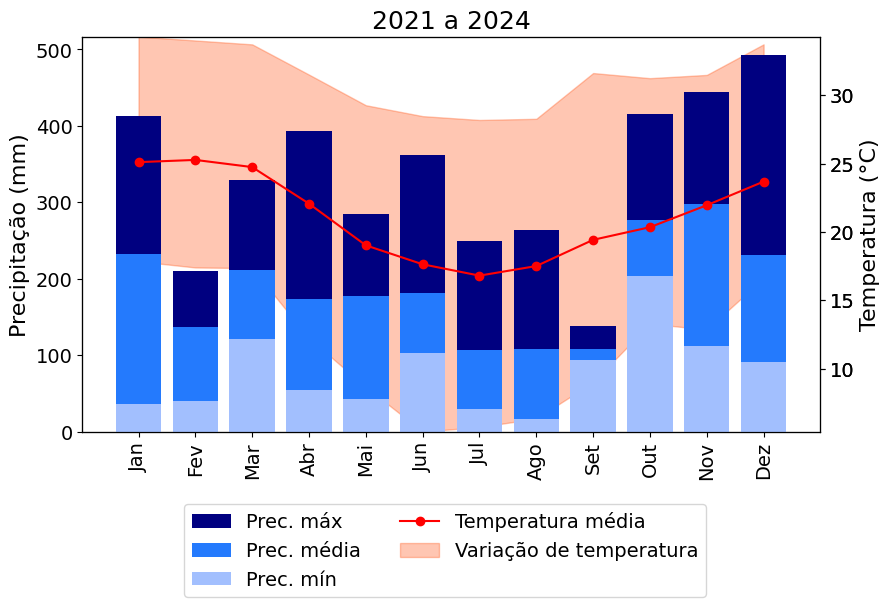

In [19]:
# Gráfico 
rotulos = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
           'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'] 

fig, ax1 = plt.subplots(figsize=(9,5)) 

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax3.fill_between(temp_med.index, 
                 temp_min['Mínimo Mensal'], 
                 temp_max['Máximo Mensal'], 
                 color='orangered', 
                 alpha=0.3, 
                 label='Variação de temperatura')  

temp, = ax2.plot(temp_med.index,
                 temp_med['Média Mensal'],
                 marker='o',
                 color='red',
                 label='Temperatura média')

ax1.bar(prec_max.index, 
        prec_max['Soma Diária'], 
        color='navy', 
        label='Prec. máx')
ax1.bar(prec_med.index, 
        prec_med['Soma Diária'], 
        color='xkcd:clear blue',
        label='Prec. média')
ax1.bar(prec_min.index, 
        prec_min['Soma Diária'],
        color='xkcd:pastel blue',
        label='Prec. mín')

ax1.set_zorder(2)
ax2.set_zorder(3)
ax3.set_zorder(1)
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2

ax1.set_xticks(prec_med.index)  # Define as posições dos ticks
ax1.set_xticklabels(rotulos, rotation=90)  

ax2.set_ylim(temp_min['Mínimo Mensal'].min(), temp_max['Máximo Mensal'].max())
ax3.set_ylim(temp_min['Mínimo Mensal'].min(), temp_max['Máximo Mensal'].max())

ax1.set_ylabel('Precipitação (mm)', fontsize=16)
ax2.set_ylabel('Temperatura (°C)', fontsize=16) 
plt.title('2021 a 2024', fontsize=18) 

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

fig.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0), 
           ncol=2, 
           fontsize=14)

fig.tight_layout()
plt.savefig("C:\\ENS\\LAUTEC\\Outputs\\2021a2024.png",
            bbox_inches='tight')

In [23]:
prec_min

,Soma Diária,Registros,Falhas
Mês,,,
1,35.8,683,0
2,39.4,670,0
3,120.6,725,0
4,54.8,719,0
5,42.0,743,0
6,103.2,720,0
7,29.6,740,0
8,16.6,743,0
9,93.8,719,0


In [24]:
prec_med

,Soma Diária,Registros,Falhas
Mês,,,
1,232.15,726.75,5.25
2,137.20,677.50,0.50
3,211.40,739.00,5.00
4,173.30,719.50,0.50
5,176.85,743.75,0.25
6,181.15,720.00,0.00
7,106.10,742.00,2.00
8,108.50,743.50,0.50
9,108.00,719.75,0.25


In [25]:
prec_max

,Soma Diária,Registros,Falhas
Mês,,,
1,412.4,744,13
2,209.8,696,2
3,328.6,744,19
4,393.0,720,1
5,284.4,744,1
6,361.6,720,0
7,249.6,744,4
8,263.2,744,1
9,138.4,720,1


In [26]:
temp_min

,Mínimo Mensal,Registros,Falhas
Mês,,,
1,17.8475,30.50,0.50
2,17.3975,27.75,0.50
3,17.3525,30.50,0.50
4,12.2275,29.50,0.50
5,8.6525,30.00,1.00
6,5.3950,30.00,0.00
7,5.7225,30.00,1.00
8,6.3500,30.50,0.50
9,9.0075,29.75,0.25


In [27]:
temp_med

,Média Mensal,Registros,Falhas
Mês,,,
1,25.102645,30.75,0.25
2,25.265250,27.75,0.50
3,24.740543,30.50,0.50
4,22.063247,29.50,0.50
5,19.016901,30.25,0.75
6,17.630583,30.00,0.00
7,16.800860,30.00,1.00
8,17.501454,30.50,0.50
9,19.418897,29.75,0.25


In [28]:
temp_max

,Máximo Mensal,Registros,Falhas
Mês,,,
1,34.2850,30.75,0.25
2,34.0025,27.75,0.50
3,33.7175,30.50,0.50
4,31.5050,29.50,0.50
5,29.2650,30.25,0.75
6,28.4675,30.00,0.00
7,28.1875,30.00,1.00
8,28.2725,30.50,0.50
9,31.6200,29.75,0.25
